# This is a test for building a Neural network and optimizers from sctach

In [ ]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [ ]:
# this to add the functions to the class in different cell
def add_to_class(Class): 
  def wrapper(obj):
    setattr(Class, obj.__name__, obj)
  return wrapper  

In [ ]:
class NN:
    def __init__(self, learning_rate=0.001, max_iter=1000, bias=0, threshold="Sigmoid"):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.bias = bias
        self.threshold = threshold
        self.W = []


In [ ]:
# activation functions

@add_to_class(NN)
def fThreshold(self, x):
    if self.threshold == "Sigmoid":
        return 1 / (1 + np.exp(-x))
    elif self.threshold == "Tanh":
        return (1 - np.exp(-x)) / (1 + np.exp(-x))
    else:
        return x

@add_to_class(NN)
def dthreshold(self, x):
        if self.threshold == "Sigmoid":
            return self.fThreshold(x) * (1 - self.fThreshold(x))
        elif self.threshold == "Tanh":
            return (1 - self.fThreshold(x)) * (1 + self.fThreshold(x))
        else:
            return x

In [ ]:
# cost function and the derivative
@add_to_class(NN)
def cost(self, y, y_hat):
    return 1 / 2 * (y - y_hat) ** 2

@add_to_class(NN)
def dcost(self, y, y_hat):
    return (y_hat - y)

In [ ]:
# creating the layers for the MLP
@add_to_class(NN)
def layers(self, inputSize, layerSizes, numOfOutput):
    if len(layerSizes) != 0:
        self.W.append(np.random.normal(0,1,(inputSize + self.bias, layerSizes[0]) ))
        for i in range(len(layerSizes) - 1):
            self.W.append(np.random.normal(0,1,(layerSizes[i] + self.bias, layerSizes[i + 1])))
        self.W.append(np.random.normal(0,1,(layerSizes[-1] + self.bias, numOfOutput)))
    else:
        self.W.append(
            np.random.normal(0,1,(inputSize + self.bias, numOfOutput) ))  # condition that the is no hidden layers


In [ ]:
# Forward Prop
@add_to_class(NN)
def forward(self, X):
    input = []
    net = []
    if self.bias == 1:
        input.append(np.hstack((np.ones([X.shape[0], 1]), X))) 
    else:
        input.append(X) 
    net.append((input[0] @ self.W[0])) 
    input.append(self.fThreshold(net[0]))  

    for i in range(len(self.W) - 1):
        if self.bias == 1:
            tmp = np.hstack((np.ones([input[len(input) - 1].shape[0], 1]), input[len(input) - 1]))
        else:
            tmp = input[len(input) - 1]
        net.append((tmp @ self.W[i + 1]))

        input.append(self.fThreshold(net[len(net) - 1]))
    self.input = input
    self.net = net
    if self.bias == 1:
        self.input[0] = self.input[0][:, 1:]  
    return input[-1] 


In [ ]:
# Backword Prop
@add_to_class(NN)
def backward(self, X, y):
    dcost = (self.input[len(self.input) - 1] - y)
    for i in range(len(self.W)):

        if i == 0:  
            db = self.dthreshold(self.net[-1]) * dcost 
            dw = (self.input[-2].T @ db)  
        else:

            if self.bias == 1:
                db = self.dthreshold(self.net[-(1 + i)] * (db @ self.W[-(i)][1:].T))
                dw = (self.input[-(2 + i)].T @ db)
            else:
                db = self.dthreshold(self.net[-(1 + i)] * (db @ self.W[-(i)].T))
                dw = (self.input[-(2 + i)].T @ db)
        if self.bias == 1:
            self.W[-(i + 1)][0] -= (np.sum(db,axis=0) * self.learning_rate / X.shape[0])
            self.W[-(i + 1)][1:] -= dw * self.learning_rate / X.shape[0]
        else:
            self.W[-(i + 1)] -= dw * self.learning_rate / X.shape[0]
    return


In [ ]:
@add_to_class(NN)
def train(self, X, y, ):
    Y = np.array(splitOutputToNeural(y))
    plot1 = []
    plot2 = []
    plot3 = []
    plotting = []
    score = []
    for i in range(self.max_iter):
        self.forward(X)
        self.backward(X, Y)
        err =  np.abs(self.forward(X) - Y).sum()
        plotting.append(np.abs(self.forward(X) - Y).sum())
        score, matrix = self.test(X, y)
    plt.plot(np.arange(len(plotting)),plotting)
    print("train score", score)


In [ ]:
@add_to_class(NN)
def test(self, X, y):
    # match the output layer with the prediction
    y = np.array(splitOutputToNeural(y))
    count = 0
    y_hat = self.forward(X)
    for i in range(y.shape[0]):
        if y_hat[i ,y[i].argmax()] == y_hat[i].max():
            count +=1
    matrix = confusion_matrix(y,y_hat)
    return count / y.shape[0],matrix


In [ ]:
# add it later to the class
def splitOutputToNeural(y):
    unique = np.unique(y)
    split = []
    y = np.array(y)
    for i in range(y.shape[0]):
        tmp = np.zeros(unique.shape)
        tmp[y[i]] = 1
        split.append(tmp)
    return split

# this is for pinguins data set splitter
def dataframesplit(df):
    train = np.arange(0, 30)
    train = np.append(train, np.arange(50, 80))
    train = np.append(train, np.arange(100, 130))
    test = np.arange(30.50)
    test = np.append(test, np.arange(80, 100))
    test = np.append(test, np.arange(130, 150))
    return df.iloc[train], df.iloc[test]

def confusion_matrix(y, y_hat):
    matrix = np.zeros((y.shape[1],y.shape[1]))
    for i in range(y.shape[1]):     
        for j in range(y.shape[0]): 
            if y[j,i] == 0:
                continue
            matrix[i,y_hat[j].argmax()] += 1
    return matrix

There are two Datasets Used, penguins and the titanic

# Penguins Data

In [17]:
# must choose one of the two datasets

#df = pd.read_csv("penguins.csv")
# df

In [ ]:
# preprocessing
df.reset_index(drop=True, inplace=True)
df['gender'] = df['gender'].fillna('male')
le = LabelEncoder()
df["gender"] = df.apply(le.fit_transform)["gender"]
df["species"] = df.apply(le.fit_transform)["species"]


In [ ]:
# Data Splitting
train, test = dataframesplit(df)
y_train = train["species"]
y_test = test["species"]
X_train = train.drop(["species"], axis=1).values
X_test = test.drop(["species"], axis=1).values

# Titanic Data

In [ ]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
def preprocess(X):
    X['Fare'].fillna(int(X['Fare'].mean()), inplace=True)
    X['Age'].fillna(int(X['Age'].mean()), inplace=True)
    X = X.to_numpy()
    for i in range(X.shape[1]):
        X[:, i] = (X[:, i] - X[:, i].mean()) / X[:, i].std()
    # print(X.shape)
    return X

X = df.drop(["Name", "Ticket", "Cabin", "Embarked", "PassengerId"], axis=1)
X.replace({'male': 1, 'female': 0}, inplace=True)
X = preprocess(X)
y = np.array(df["Survived"]).reshape(X.shape[0], -1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# **PreProcessing and training**

In [ ]:
# normalize the input X
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

train score 1.0
test score 1.0
confusion matrix
 [[114.   0.]
 [  0.  65.]]


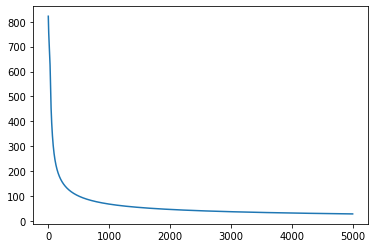

In [ ]:
# Model Training and testing
model = NN(learning_rate=1, max_iter=5000, bias=1, threshold="Sigmoid")
model.layers(inputSize=X_train.shape[1], layerSizes=[], numOfOutput=len(np.unique(y_train)))
model.train(X_train, y_train)
score,matrix =  model.test(X_test, y_test)
print("test score", score)
print("confusion matrix\n",matrix)
